<a href="https://colab.research.google.com/github/Muyiiwaa/deep-learning-from-here/blob/master/NATURAL_LANGUAGE_PROCESSING_WITH_LSTM_AND_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SENTIMENT CLASSIFICATION WITH LSTM AND RNN

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,  Dropout,Dense, Embedding,SimpleRNN

In [26]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 20000)

In [ ]:
X_train[0]

The length of all the reviews must be same before feeding them to the neural network. Hence we are using pad_sequences which pads zeros to reviews with length less than 100.

In [28]:
X_train = pad_sequences(X_train, maxlen = 100)
X_test = pad_sequences(X_test, maxlen=100)

We can see that X_train has 25000 rows and 100 columns i.e. it has 25000 reviews each with length 200

In [29]:
X_train.shape

(25000, 100)

In [30]:
vocab_size = 20000
embed_size = 128

In [31]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=60, activation='tanh'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 lstm_1 (LSTM)               (None, 60)                45360     
                                                                 
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
Total params: 2605421 (9.94 MB)
Trainable params: 2605421 (9.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 65s 334ms/step - loss: 0.0500 - accuracy: 0.9842 - val_loss: 0.5729 - val_accuracy: 0.8267
Epoch 2/5
196/196 [==============================] - 66s 335ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.7565 - val_accuracy: 0.8234
Epoch 3/5
196/196 [==============================] - 65s 332ms/step - loss: 0.0247 - accuracy: 0.9926 - val_loss: 0.8077 - val_accuracy: 0.8260
Epoch 4/5
196/196 [==============================] - 63s 323ms/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.7806 - val_accuracy: 0.8162
Epoch 5/5
196/196 [==============================] - 63s 324ms/step - loss: 0.0184 - accuracy: 0.9946 - val_loss: 0.8213 - val_accuracy: 0.8253


In [53]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

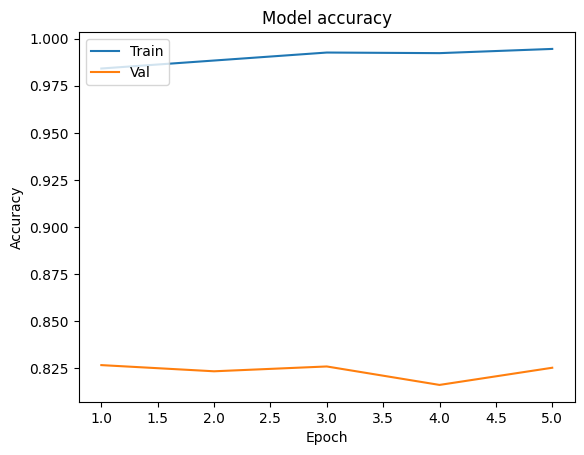

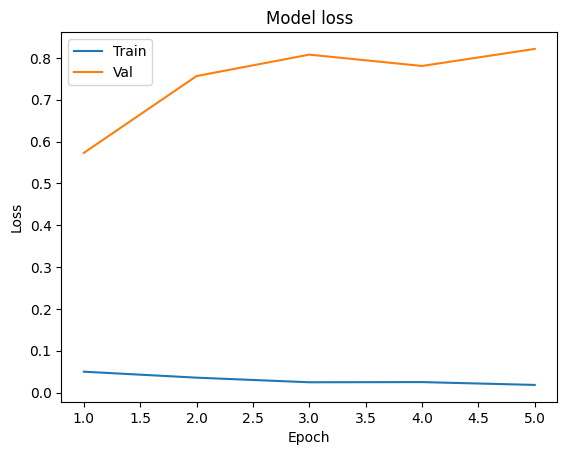

In [55]:
plot_learningCurve(history, epochs = 5)

### RECURENT NEURAL NETWORK

In [11]:
model = Sequential()

# Embedding layer
model.add(Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))

# RNN layer
model.add(SimpleRNN(units=60, activation='tanh'))

# Dense layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 27s 129ms/step - loss: 0.5626 - accuracy: 0.6932 - val_loss: 0.4135 - val_accuracy: 0.8194
Epoch 2/5
196/196 [==============================] - 22s 112ms/step - loss: 0.2835 - accuracy: 0.8856 - val_loss: 0.4192 - val_accuracy: 0.8202
Epoch 3/5
196/196 [==============================] - 28s 144ms/step - loss: 0.0950 - accuracy: 0.9688 - val_loss: 0.5099 - val_accuracy: 0.8220
Epoch 4/5
196/196 [==============================] - 26s 132ms/step - loss: 0.0209 - accuracy: 0.9953 - val_loss: 0.6267 - val_accuracy: 0.7952
Epoch 5/5
196/196 [==============================] - 24s 124ms/step - loss: 0.0045 - accuracy: 0.9997 - val_loss: 0.6709 - val_accuracy: 0.8155


In [56]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)
preds = model.predict(X_test)

782/782 [==============================] - 17s 21ms/step


In [59]:
preds = [0 if x < 0.5 else 1 for x in preds]

In [61]:
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test, y_pred = preds))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82     12500
           1       0.81      0.86      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



<Axes: >

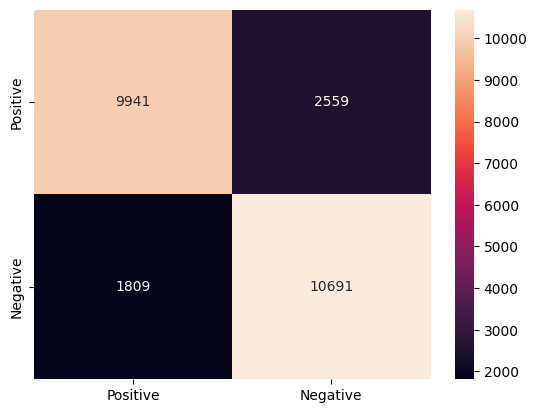

In [66]:
confusion = confusion_matrix(labels= y_test, predictions=preds)
confusion = pd.DataFrame(data = confusion, columns = ['Positive', 'Negative'],
                         index = ['Positive', 'Negative'])
sns.heatmap(data = confusion, annot = True, fmt = 'd')